# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Demo to test the code
#url = "https://api.openweathermap.org/data/2.5/weather?"
#city = 'Dublin, Ohio'
#units = 'imperial'
#query_city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
#response = requests.get(query_city_url).json()
#pprint(response)

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
                                                    #{city name},{state code},{country code}&limit={limit}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | prainha
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | jianshui
Processing Record 7 of Set 1 | kapuskasing
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | garupa
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | pathein
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | alotau
Processing Record 15 of Set 1 | ararat
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | saryozek
Processing Record 21 of Set 1 | narail
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

NameError: name 'pd' is not defined

In [9]:
# Display sample data
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,11.88,93,44,10.69,RU,1728599230
1,edinburgh of the seven seas,-37.0676,-12.3116,55.15,76,38,28.72,SH,1728599231
2,grytviken,-54.2811,-36.5092,30.09,95,100,5.21,GS,1728599232
3,prainha,-1.8000,-53.4800,87.55,43,56,4.34,BR,1728599233
4,hermanus,-34.4187,19.2345,58.39,78,99,5.53,ZA,1728599234


In [3]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,11.88,93,44,10.69,RU,1728599230
1,edinburgh of the seven seas,-37.0676,-12.3116,55.15,76,38,28.72,SH,1728599231
2,grytviken,-54.2811,-36.5092,30.09,95,100,5.21,GS,1728599232
3,prainha,-1.8000,-53.4800,87.55,43,56,4.34,BR,1728599233
4,hermanus,-34.4187,19.2345,58.39,78,99,5.53,ZA,1728599234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

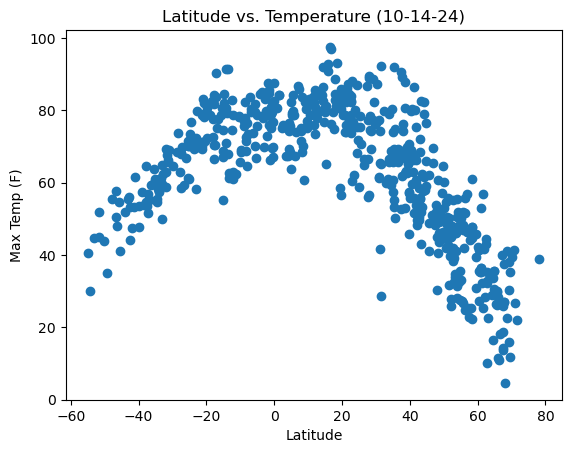

In [62]:
# CSV test
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.title('Latitude vs. Temperature (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
#plt.grid()
plt.tight_layout
plt.savefig("output_data/Fig1.png")
plt.show()


#### Latitude Vs. Humidity

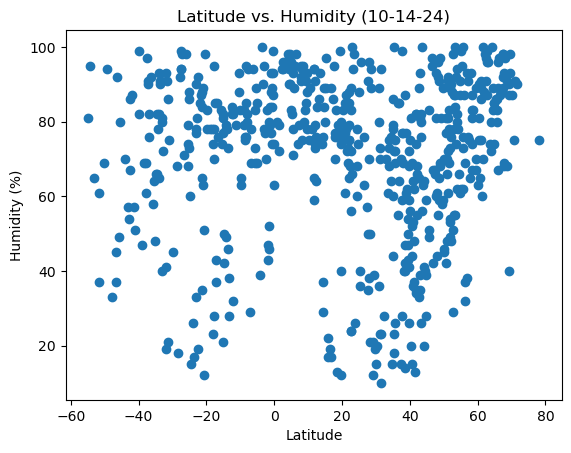

In [63]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.title('Latitude vs. Humidity (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
#plt.grid()
plt.tight_layout
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

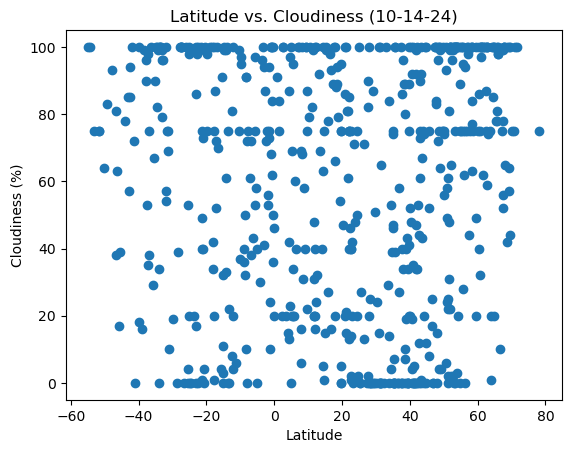

In [64]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.title('Latitude vs. Cloudiness (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.grid()
plt.tight_layout
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

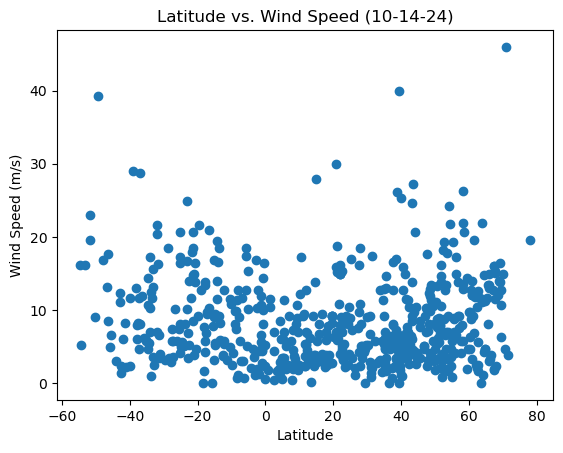

In [65]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.title('Latitude vs. Wind Speed (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
#plt.grid()
plt.tight_layout
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.05181561509837207


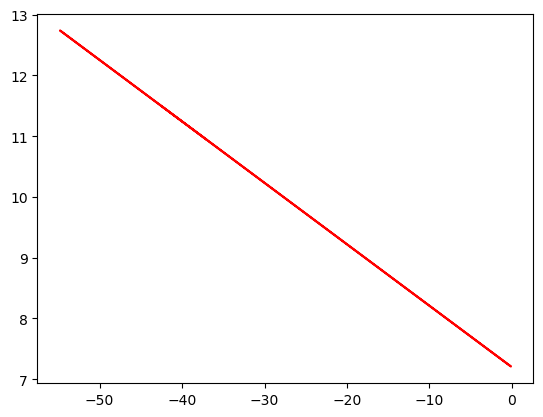

In [102]:
# Define a function to create Linear Regression plots
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

In [103]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df.head()
                                

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,11.88,93,44,10.69,RU,1728599230
5,jianshui,23.6363,102.8264,62.08,98,71,2.21,CN,1728599235
6,kapuskasing,49.4169,-82.4331,57.20,58,75,5.75,CA,1728599237
9,dudinka,69.4058,86.1778,16.02,90,57,12.73,RU,1728599240
10,pathein,16.7833,94.7333,76.15,89,16,3.98,MM,1728599241


In [104]:
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0] 
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,55.15,76,38,28.72,SH,1728599231
2,grytviken,-54.2811,-36.5092,30.09,95,100,5.21,GS,1728599232
3,prainha,-1.8000,-53.4800,87.55,43,56,4.34,BR,1728599233
4,hermanus,-34.4187,19.2345,58.39,78,99,5.53,ZA,1728599234
7,port-aux-francais,-49.3500,70.2167,35.02,94,83,39.26,TF,1728599238


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6959488680333903


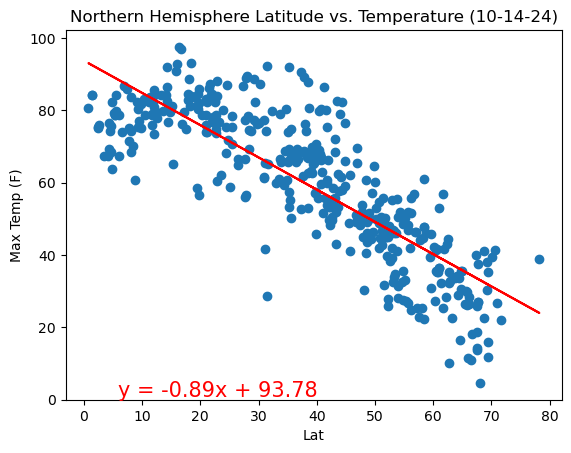

In [105]:
#Northern Hemisphere Lat and Temp


x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

plt.title('Northern Hemisphere Latitude vs. Temperature (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Max Temp (F)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig5.png")
plt.show()

The r-squared is: 0.6425002036442449


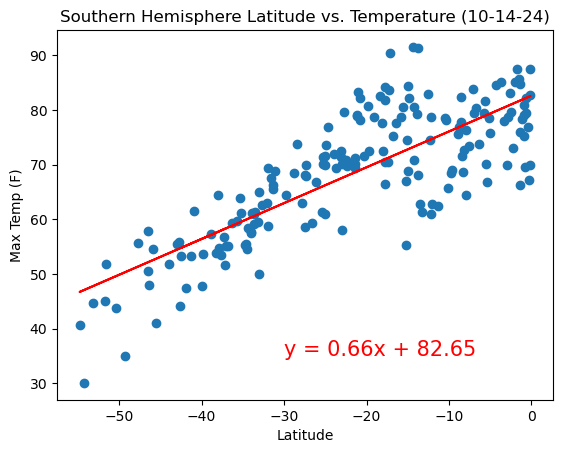

In [106]:
#Southern Hemishere Lat and Temp

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

plt.title('Southern Hemisphere Latitude vs. Temperature (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The closer to the equator (0) the hotter the temperatures

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0017839093320828278


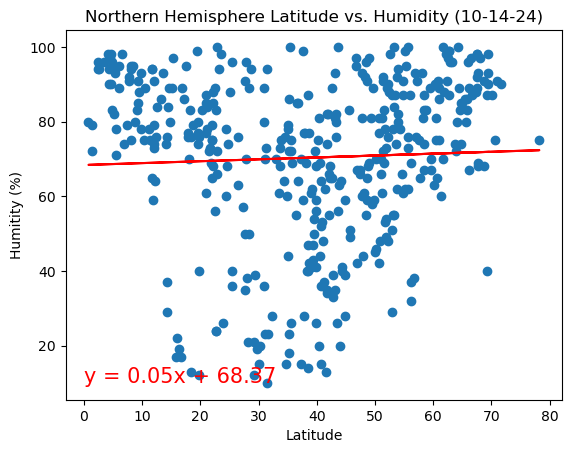

In [107]:
#Northern Hemisphere Lat and Humidity



x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

plt.title('Northern Hemisphere Latitude vs. Humidity (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig7.png")
plt.show()

The r-squared is: 0.009798477851986788


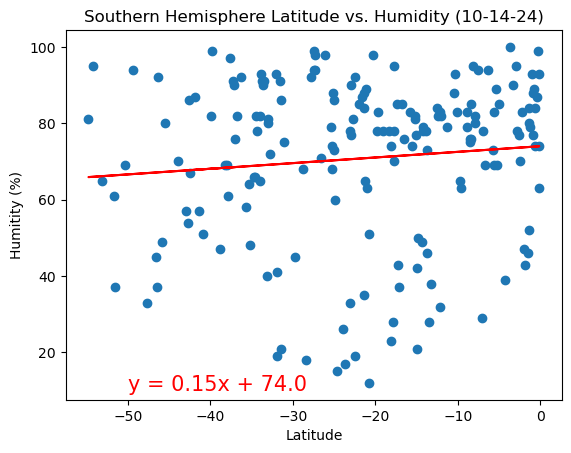

In [108]:
#Southern Hemisphere Lat and Humidity


x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

plt.title('Southern Hemisphere Latitude vs. Humidity (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE 

There doesn't seem to be a big correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.043043610184359586


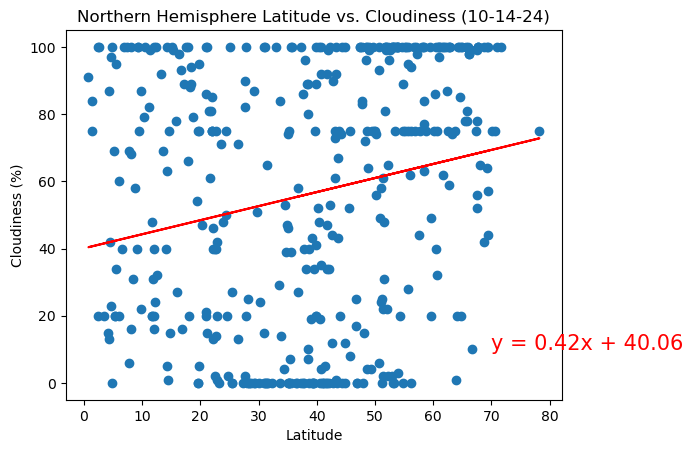

In [109]:
#Northern Hemisphere Lat and Cloudiness


x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

plt.title('Northern Hemisphere Latitude vs. Cloudiness (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(70,10),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig9.png")
plt.show()


The r-squared is: 0.016008238211788064


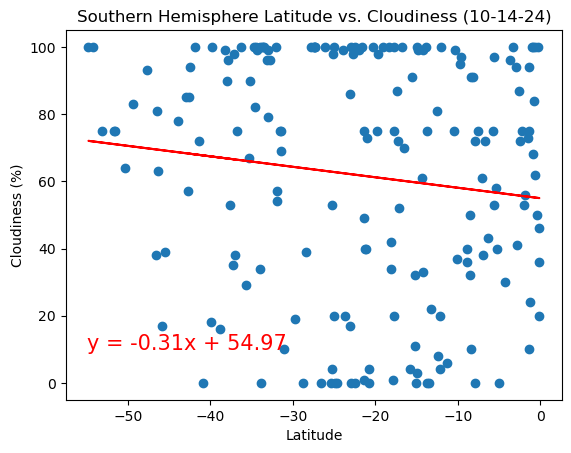

In [110]:
#Southern Hemisphere Lat and Cloudiness


x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

plt.title('Southern Hemisphere Latitude vs. Cloudiness (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
It appears that latitude is not significant in term sof cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.054807113015532566


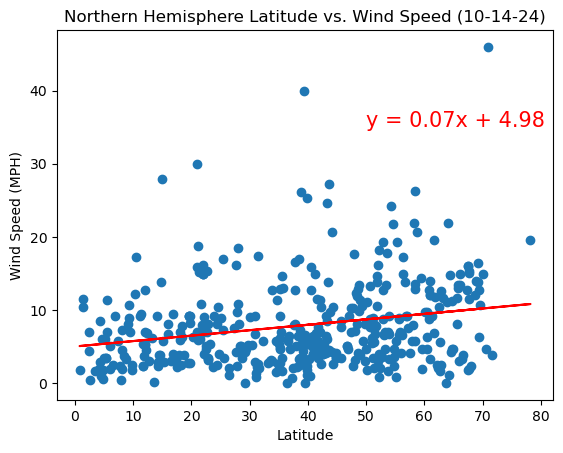

In [111]:
#Northern Hemisphere Lat and Wind Speed


x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

plt.title('Northern Hemisphere Latitude vs. Wind Speed (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,35),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig11.png")
plt.show()

The r-squared is: 0.05181561509837207


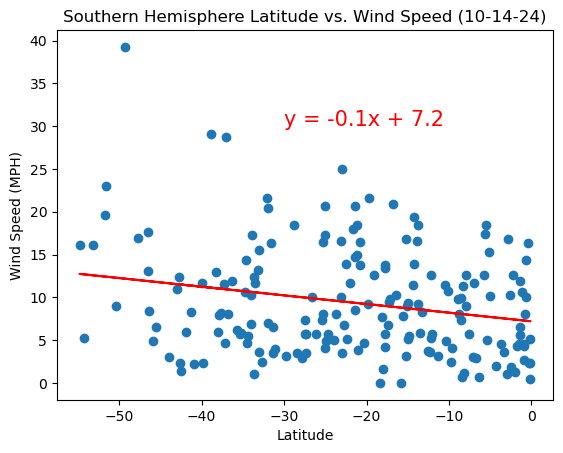

In [112]:
#Southern Hemisphere Lat and Wind Speed


x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

plt.title('Southern Hemisphere Latitude vs. Wind Speed (10-14-24)')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
#plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Wind Speed tends to cluster in the Northern Hemisphere as compared to the Southern Hemisphere.